# Demo: Using pre_trained network with Keras

Below, you'll be able to check out the predictions from an ImageNet pre-trained Resnet network with Keras.

# Load some example images

['images\\dog_labrador.jpg', 'images\\elephant.jpg', 'images\\streetcar.jpg', 'images\\tiger.jpg', 'images\\zebra.jpg']


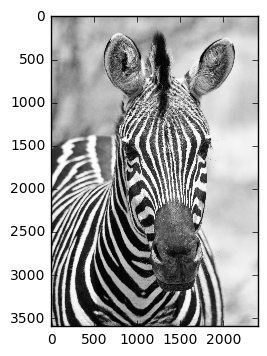

In [1]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image_paths = glob('images/*.jpg')

# Print out the image paths
print(image_paths)

# View an example of an image
example = mpimg.imread(image_paths[4])
plt.imshow(example)
plt.show()

# Pre-process an image

Note that the image.load_img() function will re-size our image to 224x224 as desired for input into this VGG16 model,
so the images themselves don't have to be 224x224 to start.

In [2]:
# Here, we'll load an image and pre-process it
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

i = 4 # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Using TensorFlow backend.


In [3]:

from keras.applications.resnet50 import  ResNet50, decode_predictions

# Load the pre-trained model
model =  ResNet50(weights='imagenet',include_top=True)
#model.summary()
# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02391049', 'zebra', 0.9999373), ('n01798484', 'prairie_chicken', 2.1077745e-05), ('n02643566', 'lionfish', 8.4596868e-06)]


In [4]:
from keras.applications.vgg16 import  VGG16, decode_predictions

# Load the pre-trained model
model =  VGG16(weights='imagenet',include_top=True)
#model.summary()
# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02391049', 'zebra', 0.99998581), ('n01798484', 'prairie_chicken', 8.5838146e-06), ('n02128925', 'jaguar', 1.6407373e-06)]
